In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
path = "/Users/mikis/Downloads/ML project files/train.csv"
df = pd.read_csv(path)

In [3]:
df[['purchase', 'PageValues']][df.purchase == 1][df.PageValues == 0].count()

/var/folders/28/zczhf10x31gd80g6tj6qwq340000gn/T/ipykernel_35503/4174801573.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[['purchase', 'PageValues']][df.purchase == 1][df.PageValues == 0].count()


purchase      309
PageValues    309
dtype: int64

In [46]:
"""
Data set size:
- Num of samples - 10479 only for training. It is not a small number,
    so we can allow ourselves to filter outliers and records missing important values.
- Number of features - excluding the id (index) + purchase (label) we are left with 22 features,
    which is a very high number. We should explore the features more and try methods for reducing dimensions
    and see how they effect our results.
"""
df.shape

(10479, 24)

In [4]:
df.head(30)

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
5,5,0.0,0.0,0.0,0.0 minutes,2.0,NaN,NaN,0.000000,0.100000,...,2.0,NaN,2.0,Returning_Visitor,False,c_3,104.712405,log200,NaN,0
6,6,0.0,0.0,0.0,0.0 minutes,3.0,738.0 minutes,NaN,0.000000,0.022222,...,2.0,edge_96.0.1054.72,1.0,Returning_Visitor,False,c_2,89.786568,log404,NaN,0
7,7,0.0,0.0,0.0,0.0 minutes,3.0,395.0 minutes,395.000000,0.000000,0.066667,...,1.0,safari_15,3.0,Returning_Visitor,False,c_3,101.184534,log_100,NaN,0
8,8,NaN,0.0,0.0,0.0 minutes,16.0,407.75 minutes,NaN,0.018750,0.025833,...,1.0,safari_15.4,4.0,Returning_Visitor,False,NaN,83.931739,log_100,NaN,0
9,9,0.0,0.0,0.0,0.0 minutes,7.0,280.5 minutes,280.500000,0.000000,0.028571,...,1.0,safari_15.2,1.0,Returning_Visitor,False,c_3,97.899633,log200,NaN,0


In [17]:
df.A.unique()

array(['c_1', 'c_3', 'c_4', 'c_2', nan, 'c_5', 'c_6', 'c_8', 'c_10',
       'c_11', 'c_9', 'c_7', 'c_13', 'c_14', 'c_15', 'c_18', 'c_19',
       'c_16', 'c_17', 'c_20_27', 'c_20_6', 'c_20_99', 'c_20_87',
       'c_20_55', 'c_20_10', 'c_20_89', 'c_20_74', 'c_20_40', 'c_20_61',
       'c_20_14', 'c_20_44', 'c_20_35', 'c_20_95', 'c_20_97', 'c_20_67',
       'c_20_71', 'c_20_39', 'c_20_22', 'c_20_9', 'c_20_58', 'c_20_19',
       'c_20_82', 'c_20_93', 'c_20_94', 'c_20_4', 'c_20_30', 'c_20_15',
       'c_20_47', 'c_20_90', 'c_20_34', 'c_20_79', 'c_20_8', 'c_20_68',
       'c_20_36', 'c_20_20', 'c_20_18', 'c_20_5', 'c_20_96', 'c_20_16',
       'c_20_60', 'c_20_33', 'c_20_57', 'c_20_28', 'c_20_38', 'c_20_66',
       'c_20_43', 'c_20_75', 'c_20_53', 'c_20_11', 'c_20_51', 'c_20_69',
       'c_20_54', 'c_20_78', 'c_20_81', 'c_20_25', 'c_20_49', 'c_20_29',
       'c_20_84', 'c_20_46', 'c_20_98', 'c_20_64', 'c_20_72', 'c_20_2',
       'c_20_76', 'c_20_48', 'c_20_83', 'c_20_62', 'c_20_50', 'c_20_77'

In [4]:
df.describe()

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,num_of_product_pages,total_duration,BounceRates,ExitRates,PageValues,closeness_to_holiday,device,Region,B,D,purchase
count,10479.00000,9874.000000,10066.000000,9792.000000,10076.000000,5726.000000,10457.000000,10453.000000,10452.000000,9983.000000,10156.000000,10460.000000,10456.000000,105.000000,10479.000000
mean,5239.00000,2.321957,80.462468,0.502655,31.870187,1302.457216,0.021854,0.042859,5.900387,0.061985,2.122981,3.155641,99.769628,4.060440,0.154690
std,3025.17107,3.335331,179.217548,1.265812,44.816259,2039.312905,0.048100,0.048297,18.727496,0.199429,0.906859,2.404672,10.050268,2.189818,0.361626
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,60.733919,-1.235571,0.000000
25%,2619.50000,0.000000,0.000000,0.000000,7.000000,221.000000,0.000000,0.014283,0.000000,0.000000,2.000000,1.000000,93.030568,3.141657,0.000000
50%,5239.00000,1.000000,8.000000,0.000000,18.000000,677.851191,0.002968,0.025161,0.000000,0.000000,2.000000,3.000000,99.787249,4.432221,0.000000
75%,7858.50000,4.000000,93.000000,0.000000,38.000000,1605.733333,0.016667,0.050000,0.000000,0.000000,3.000000,4.000000,106.506626,5.531061,0.000000
max,10478.00000,27.000000,3398.750000,24.000000,705.000000,47850.920680,0.200000,0.200000,361.763742,1.000000,8.000000,9.000000,141.735142,7.618254,1.000000


In [44]:
# Get percentage of missing data out of all values
data_summary = pd.DataFrame()
data_summary['missing'] = df.isna().sum()
data_summary['percentile'] = (data_summary.missing / df.shape[0]) * 100
data_summary.sort_values(by='missing', ascending=False)

,missing,percentile
D,10374,98.997996
total_duration,4753,45.357381
A,706,6.737284
num_of_info_pages,687,6.555969
product_page_duration,621,5.926138
num_of_admin_pages,605,5.773452
internet_browser,563,5.372650
closeness_to_holiday,496,4.733276
admin_page_duration,413,3.941216
num_of_product_pages,403,3.845787


Lessons from missing values: D is almost fully null, total duration also 45% which is very high. A lot of columns with 5-6% missing data, worth filling the gaps - we need to look on what method might fill the data most accurately.

In [ ]:
numeric_columns = ['num_of_info_pages', 'closeness_to_holiday', 'admin_page_duration']
label_columns = ['internet_browser', 'device']

id
num_of_admin_pages
admin_page_duration
num_of_info_pages
info_page_duration


TypeError: no numeric data to plot

<Figure size 21600x36000 with 0 Axes>

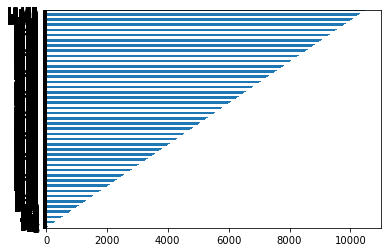

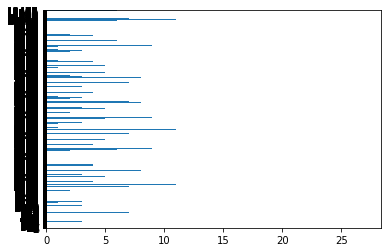

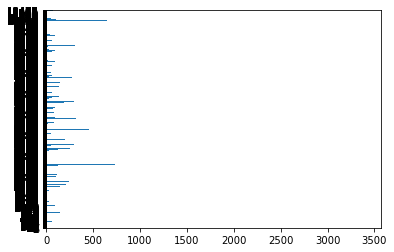

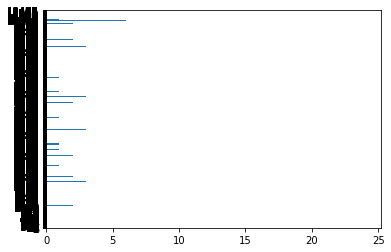

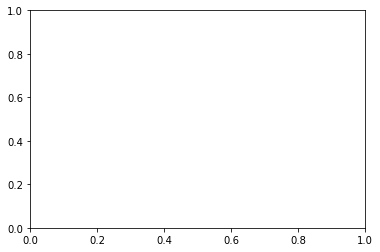

In [7]:
plt.figure(figsize=(300, 500))
for col in df.columns:
    plt.figure()
    print(col)
    df[col].plot.barh()

<AxesSubplot:>

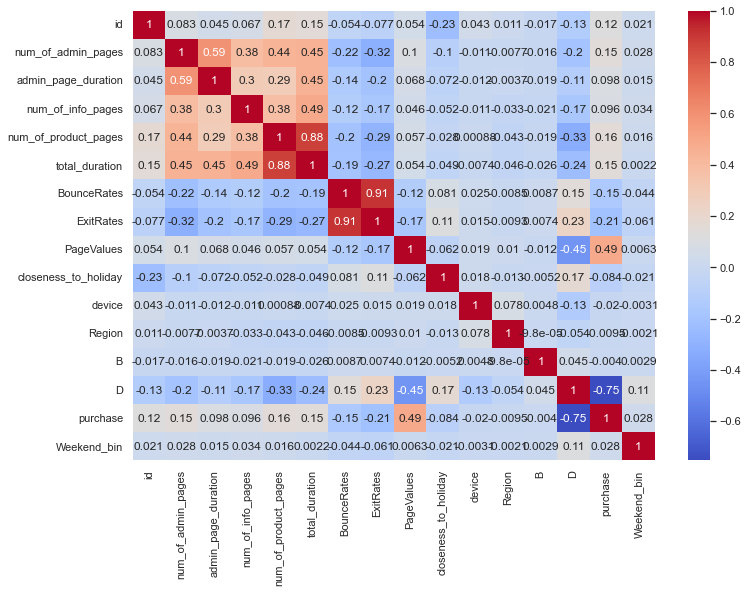

In [6]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Notes from correlation matrix:
1. BoundRates and ExitRates have very high correlation - 0.91 . Looking at the features explenations their meaning sounds very much alike, this can explain the similarity. We should pay attention and see if one of them should be reduced.
2. Total_duration and num_of_product_pages are also highly correlated - 0.88. Logically we can explain it if most of the session time is dedicated to reviewing products. 
3. D is highly correlated (-0.75) to purchase, which is the label we'll be trying to predict. It is interesting as easrlier we have noticed most of its values are Nan. Below we've tried to look deeper on the connection between the two by grouping them together and counting how many sessions fit to each combination, and it looks like the ratio of purchase vs not is pretty much the same whether there is D or not. 
4. Other than this, the column most correlated with purchase is PageValues. It also makes sense as usually if the user exists without making a purchase, it hints a 0 value. If a purchase was made, it is very likely the value will be highter than 0. Below a mode detail validation on this theory.

In [43]:
# Check the connection between D and purchase, is it an interesting column to indicate purchase (doesn't seem so)
df['no_D'] = df.D.isna()
df[['no_D', 'purchase','id']].groupby(['no_D', 'purchase']).count()

id
no_D  purchase      
False 0           90
      1           15
True  0         8768
      1         1606

In [42]:
"""
Check connection between pages to the existence of page value (higher than 0).
It is noticable that it's much more likely that if value == 0, a purchase was made and vice versa.
"""
pg_value_to_purchase = pd.DataFrame()
pg_value_to_purchase['purchase'] = df['purchase']
pg_value_to_purchase['is_page_value'] = df['PageValues'].apply(lambda x: x != 0)
pg_value_to_purchase.groupby(['purchase', 'is_page_value']).size()

purchase  is_page_value
0         False            7829
          True             1029
1         False             309
          True             1312
dtype: int64

In [48]:
for col in df.columns:
    try:
        df[col].hist()
    except Exception:
        print(f"{col} is not good for histograms..")

Weekend is not good for histograms..
Error in callback <function flush_figures at 0x7fa0ce214040> (for post_execute):


KeyboardInterrupt: 

In [5]:
def convert_bool_to_bin(val):
    if val is True:
        return 1
    return 0

df['Weekend']
df['Weekend_bin'] = df['Weekend'].apply(convert_bool_to_bin)

In [4]:
df[['info_page_duration', 'product_page_duration', 'total_duration']]

,info_page_duration,product_page_duration,total_duration
0,0.0 minutes,0.0 minutes,NaN
1,0.0 minutes,0.0 minutes,0.000000
2,NaN,627.5 minutes,627.500000
3,0.0 minutes,154.2166667 minutes,154.216667
4,0.0 minutes,0.0 minutes,NaN
...,...,...,...
10474,0.0 minutes,1783.791667 minutes,1928.791667
10475,0.0 minutes,465.75 minutes,NaN
10476,0.0 minutes,184.25 minutes,NaN
10477,0.0 minutes,346.0 minutes,NaN


In [12]:
df[['Month', 'closeness_to_holiday', 'id']].groupby(['Month', 'closeness_to_holiday']).count().sort_values(by='id')

id
Month closeness_to_holiday      
Feb   1.0                      4
      0.2                     13
      0.6                     16
      0.8                     16
      0.4                     19
      0.0                     90
May   1.0                    119
      0.2                    134
      0.4                    180
June  0.0                    239
May   0.8                    250
      0.6                    274
Aug   0.0                    344
Jul   0.0                    353
Sep   0.0                    360
Oct   0.0                    453
Dec   0.0                   1378
Mar   0.0                   1545
May   0.0                   1781
Nov   0.0                   2403

In [17]:
lr = LogisticRegression()

In [19]:
df

,id,num_of_admin_pages,admin_page_duration,num_of_info_pages,info_page_duration,num_of_product_pages,product_page_duration,total_duration,BounceRates,ExitRates,...,device,internet_browser,Region,user_type,Weekend,A,B,C,D,purchase
0,0,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,1.0,safari_15,1.0,Returning_Visitor,False,c_1,118.880094,log202,NaN,0
1,1,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,0.000000,0.200000,0.200000,...,4.0,safari_14,9.0,Returning_Visitor,False,c_3,113.358423,log404,NaN,0
2,2,0.0,0.0,0.0,NaN,NaN,627.5 minutes,627.500000,0.020000,0.050000,...,3.0,browser_3_v17,1.0,Returning_Visitor,True,c_4,121.507695,log202,NaN,0
3,3,0.0,0.0,0.0,0.0 minutes,19.0,154.2166667 minutes,154.216667,0.015789,0.024561,...,2.0,chrome_99.1.3,1.0,Returning_Visitor,False,c_3,93.747176,log_100,NaN,0
4,4,0.0,0.0,0.0,0.0 minutes,1.0,0.0 minutes,NaN,0.200000,0.200000,...,2.0,edge_96.0.1054.75,3.0,Returning_Visitor,False,c_3,99.545824,log202,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,10474,3.0,145.0,0.0,0.0 minutes,53.0,1783.791667 minutes,1928.791667,0.007143,0.029031,...,4.0,browser_6_v12,1.0,Returning_Visitor,True,c_1,79.548460,log400,NaN,0
10475,10475,0.0,0.0,0.0,0.0 minutes,5.0,465.75 minutes,NaN,0.000000,0.021333,...,3.0,chrome_98.0.1,1.0,Returning_Visitor,True,c_8,99.457255,log202,NaN,0
10476,10476,0.0,0.0,0.0,0.0 minutes,6.0,184.25 minutes,NaN,0.083333,0.086667,...,3.0,chrome_99.1.3,1.0,Returning_Visitor,True,c_13,94.417344,log8080,NaN,0
10477,10477,4.0,75.0,0.0,0.0 minutes,15.0,346.0 minutes,NaN,0.000000,0.021053,...,2.0,chrome_80,3.0,Returning_Visitor,False,c_11,108.919057,log400,NaN,0
